In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # for Dickey-Fuller Test
from additional import DickeyFuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
SBIN = pd.read_csv("D:/time-series-stock-pred/equities/SBIN.csv")

In [3]:
SBIN.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409935,43733533
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014927,56167280
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694573,68296318
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654140,86073880
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588825,76613039


In [4]:
SBIN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7080 non-null   object 
 1   Open       7080 non-null   float64
 2   High       7080 non-null   float64
 3   Low        7080 non-null   float64
 4   Close      7080 non-null   float64
 5   Adj Close  7080 non-null   float64
 6   Volume     7080 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 387.3+ KB


In [5]:
SBIN["Date"] = pd.to_datetime(SBIN["Date"])

In [6]:
SBIN = SBIN[SBIN["Date"] >= '2018-01-01'].reset_index(drop = True)

In [7]:
DickeyFuller.StationarityCheck(SBIN)

Results of Dickey Fuller Test
Test Statistics: 0.36507180807207246
p-value: 0.9801406999203893
Number of lags used: 5
Number of observations used: 1519
critical value (1%): -3.4346623009329513
critical value (5%): -2.8634446113978034
critical value (10%): -2.5677839889683494


In [8]:
SBIN['log Adj Close'] = np.log(SBIN['Adj Close'])
SBIN_log_moving_avg = SBIN['log Adj Close'].rolling(12).mean()
SBIN_log_std = SBIN['log Adj Close'].rolling(12).std()

Text(0.5, 1.0, 'Rolling Mean and Standard Deviation')

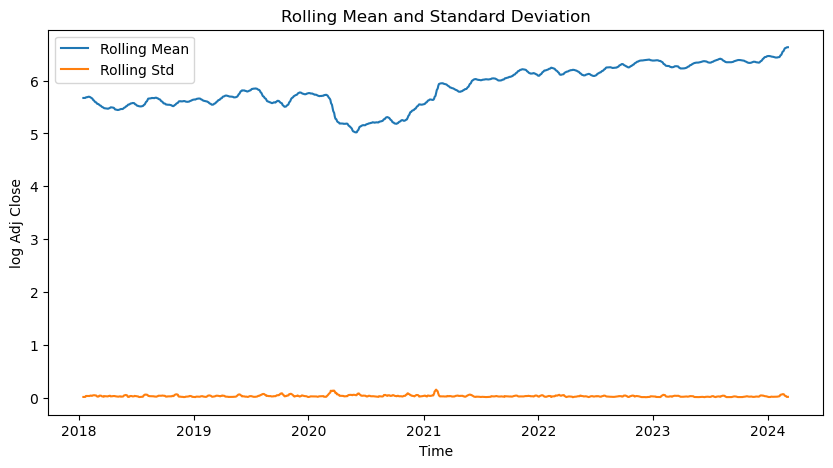

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(SBIN['Date'], SBIN_log_moving_avg, label="Rolling Mean")
plt.plot(SBIN['Date'], SBIN_log_std, label="Rolling Std")
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")

In [10]:
SBIN_Train_Data = SBIN[SBIN['Date'] < '2023-01-12']
SBIN_Test_Data = SBIN[SBIN['Date'] >= '2023-01-12'].reset_index(drop=True)

print("Size of Training Data :{}".format(SBIN_Train_Data.shape))
print("Size of Testing Data :{}".format(SBIN_Test_Data.shape))

Size of Training Data :(1244, 8)
Size of Testing Data :(281, 8)


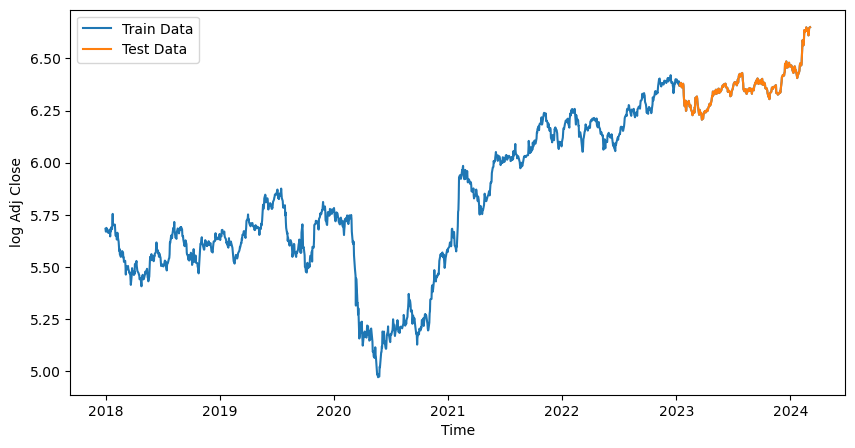

In [12]:

plt.figure(figsize=(10, 5))
plt.plot(SBIN['Date'], SBIN['log Adj Close'], label='Train Data')
plt.plot(SBIN_Test_Data['Date'], SBIN_Test_Data['log Adj Close'], label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

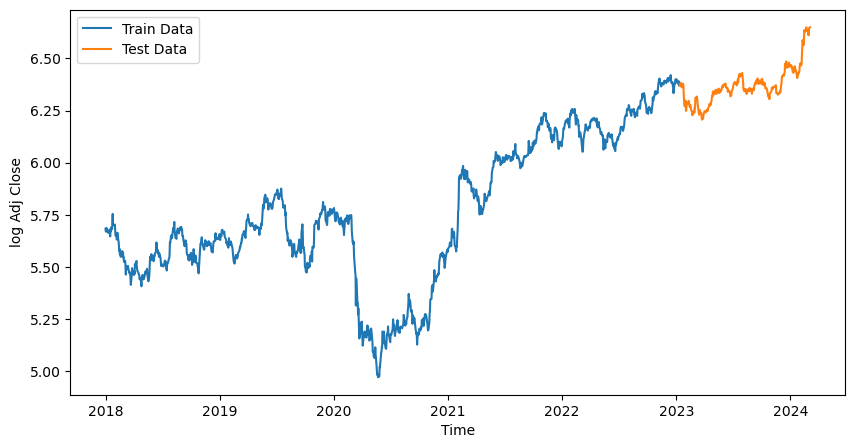

In [13]:

plt.figure(figsize=(10, 5))
plt.plot(SBIN_Train_Data['Date'], SBIN_Train_Data['log Adj Close'], label='Train Data')
plt.plot(SBIN_Test_Data['Date'], SBIN_Test_Data['log Adj Close'], label='Test Data')
plt.xlabel('Time')
plt.ylabel('log Adj Close')
plt.legend(loc='best')

In [14]:
ARIMA_MODEL = ARIMA(SBIN_Train_Data['log Adj Close'], order=(5, 2, 2))
FITTED_ARIMA = ARIMA_MODEL.fit()
print(FITTED_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:          log Adj Close   No. Observations:                 1244
Model:                 ARIMA(5, 2, 2)   Log Likelihood                2955.706
Date:                Mon, 25 Mar 2024   AIC                          -5895.411
Time:                        15:42:56   BIC                          -5854.416
Sample:                             0   HQIC                         -5879.995
                               - 1244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7774      0.108     -7.204      0.000      -0.989      -0.566
ar.L2         -0.0024      0.033     -0.073      0.942      -0.068       0.063
ar.L3          0.0233      0.030      0.781      0.4

c:\Users\thepr\.conda\envs\tf_exec_2.10\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [15]:
AUTO_ARIMA = auto_arima(SBIN_Train_Data['log Adj Close'], seasonal=False)
print(AUTO_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1244
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2956.356
Date:                Mon, 25 Mar 2024   AIC                          -5910.712
Time:                        15:43:13   BIC                          -5905.586
Sample:                             0   HQIC                         -5908.784
                               - 1244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0005    1.1e-05     45.514      0.000       0.000       0.001
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):              1144.16
Prob(Q):                              0.41   Pr

c:\Users\thepr\.conda\envs\tf_exec_2.10\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


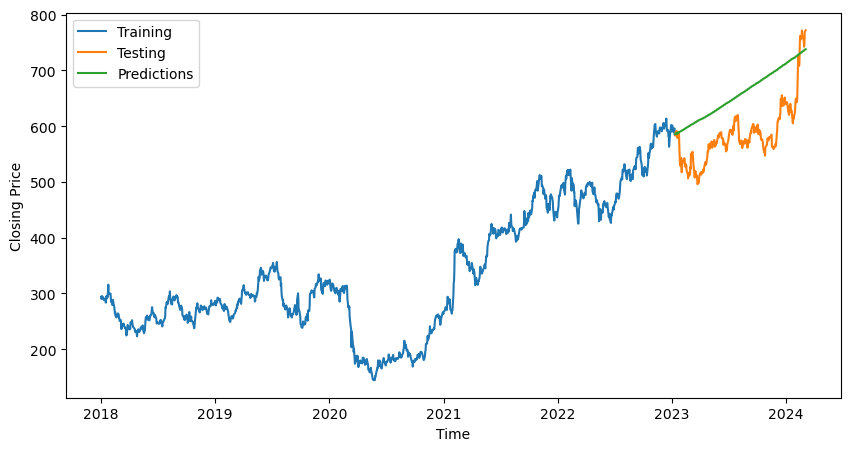

In [16]:
SBIN_PREDS = FITTED_ARIMA.forecast(281,alpha=0.05)
SBIN_PREDICTION = np.exp(SBIN_PREDS)
plt.figure(figsize=(10, 5))
plt.plot(SBIN_Train_Data['Date'], SBIN_Train_Data['Adj Close'], label='Training')
plt.plot(SBIN_Test_Data['Date'], SBIN_Test_Data['Adj Close'], label='Testing')
plt.plot(SBIN_Test_Data['Date'], SBIN_PREDICTION, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [17]:
SBIN_PREDICTION_REINDEXED = SBIN_PREDICTION.reset_index(drop=True)

In [18]:
import math
rmse = math.sqrt(mean_squared_error(SBIN_Test_Data['Adj Close'], SBIN_PREDICTION))
mape = np.mean(
    np.abs(SBIN_PREDICTION_REINDEXED - SBIN_Test_Data['Adj Close']) / np.abs(SBIN_Test_Data['Adj Close']))

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 79.98338976515527
MAPE: 0.1294805596771422
